% Data

% 0   Date                    Match Date

% 1   Team                    Playing Team 

% 2   Opponent                Opponent Team 

% 3   Goal Scored             Number of goals scored by this team  

% 4   Ball Possession %       Amount of time ball was in control by the team 

% 5   Attempts                Number of attempts to score goal 

% 6   On-Target               Number of shots on-target 

% 7   Off-Target              Number of shots that went off-target 

% 8   Blocked                 Number of opponent team's attempts blocked by the team  

% 9   Corners                 Number of corner shots used  

% 10  Offsides                Number of off-side events 

% 11  Free Kicks              Number of free-kicks used  

% 12  Saves                   Number saves by the goal keeper

% 13  Pass Accuracy %         Percentage of passes that reached the same team player as aimed 

% 14  Passes                  Total number of passes by the team 

% 15  Distance Covered (Kms)  Total distance covered by the team members in this game 

% 16  Fouls Committed         Number of fouls committed by the team members 

% 17  Yellow Card             Number of Yellow warning received 

% 18  Yellow & Red            Number of Yellow & Red warning received

% 19  Red                     Number of Red cards received 

% 20  Man of the Match        Did this team member win Man of the Match? 

% 21  1st Goal                When did the team score the 1st goal? 

% 22  Round                   Stage of the match 

% 23  PSO                     Was there a penalty shootout (PSO) in this match? 

% 24  Goals in PSO            Number of goals scored in the Penalty shootout 

% 25  Own goals               Number of own goals

% 26  Own goal Time           When did the team score own goal?


In [49]:
print("*"*100)


****************************************************************************************************


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import skew

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
print("*"*100)


In [50]:
# Doc file data

data = pd.read_csv('FIFA2018Statistics.csv')

data.info()
print("*"*100)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    128 non-null    object 
 1   Team                    128 non-null    object 
 2   Opponent                128 non-null    object 
 3   Goal Scored             128 non-null    int64  
 4   Ball Possession %       128 non-null    int64  
 5   Attempts                128 non-null    int64  
 6   On-Target               128 non-null    int64  
 7   Off-Target              128 non-null    int64  
 8   Blocked                 128 non-null    int64  
 9   Corners                 128 non-null    int64  
 10  Offsides                128 non-null    int64  
 11  Free Kicks              128 non-null    int64  
 12  Saves                   128 non-null    int64  
 13  Pass Accuracy %         128 non-null    int64  
 14  Passes                  128 non-null    in

In [3]:
data.shape
print("*"*100)


(128, 27)

In [4]:
data.dtypes
print("*"*100)


Date                       object
Team                       object
Opponent                   object
Goal Scored                 int64
Ball Possession %           int64
Attempts                    int64
On-Target                   int64
Off-Target                  int64
Blocked                     int64
Corners                     int64
Offsides                    int64
Free Kicks                  int64
Saves                       int64
Pass Accuracy %             int64
Passes                      int64
Distance Covered (Kms)      int64
Fouls Committed             int64
Yellow Card                 int64
Yellow & Red                int64
Red                         int64
Man of the Match           object
1st Goal                  float64
Round                      object
PSO                        object
Goals in PSO                int64
Own goals                 float64
Own goal Time             float64
dtype: object

In [5]:
data.head()
print("*"*100)


,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,...,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,14-06-2018,Russia,Saudi Arabia,5,40,13,7,3,3,6,...,0,0,0,Yes,12.0,Group Stage,No,0,NaN,NaN
1,14-06-2018,Saudi Arabia,Russia,0,60,6,0,3,3,2,...,0,0,0,No,NaN,Group Stage,No,0,NaN,NaN
2,15-06-2018,Egypt,Uruguay,0,43,8,3,3,2,0,...,2,0,0,No,NaN,Group Stage,No,0,NaN,NaN
3,15-06-2018,Uruguay,Egypt,1,57,14,4,6,4,5,...,0,0,0,Yes,89.0,Group Stage,No,0,NaN,NaN
4,15-06-2018,Morocco,Iran,0,64,13,3,6,4,5,...,1,0,0,No,NaN,Group Stage,No,0,1.0,90.0


In [6]:
numerical_features   = data.select_dtypes(include = [np.number]).columns
categorical_features = data.select_dtypes(include= [np.object]).columns
print("*"*100)


In [7]:
numerical_features
print("*"*100)


Index(['Goal Scored', 'Ball Possession %', 'Attempts', 'On-Target',
       'Off-Target', 'Blocked', 'Corners', 'Offsides', 'Free Kicks', 'Saves',
       'Pass Accuracy %', 'Passes', 'Distance Covered (Kms)',
       'Fouls Committed', 'Yellow Card', 'Yellow & Red', 'Red', '1st Goal',
       'Goals in PSO', 'Own goals', 'Own goal Time'],
      dtype='object')

In [8]:
categorical_features
print("*"*100)


Index(['Date', 'Team', 'Opponent', 'Man of the Match', 'Round', 'PSO'], dtype='object')

In [9]:
data.describe()
print("*"*100)


,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,...,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red,1st Goal,Goals in PSO,Own goals,Own goal Time
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,...,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,94.000000,128.000000,12.0,12.000000
mean,1.320312,49.992188,12.593750,3.914062,5.273438,3.359375,4.718750,1.343750,14.890625,2.726562,...,462.648438,106.664062,13.546875,1.695312,0.015625,0.015625,39.457447,0.203125,1.0,45.833333
std,1.156519,10.444074,5.245827,2.234403,2.409675,2.403195,2.446072,1.193404,4.724262,2.049447,...,151.186311,11.749537,4.619131,1.325454,0.124507,0.124507,24.496506,0.807049,0.0,29.978275
min,0.000000,25.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,...,189.000000,80.000000,5.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0,12.000000
25%,0.000000,42.000000,9.000000,2.000000,4.000000,1.750000,3.000000,0.000000,11.000000,1.000000,...,351.000000,101.000000,10.000000,1.000000,0.000000,0.000000,18.250000,0.000000,1.0,21.750000
50%,1.000000,50.000000,12.000000,3.500000,5.000000,3.000000,5.000000,1.000000,15.000000,2.000000,...,462.000000,104.500000,13.000000,2.000000,0.000000,0.000000,39.000000,0.000000,1.0,35.000000
75%,2.000000,58.000000,15.000000,5.000000,7.000000,4.000000,6.000000,2.000000,18.000000,4.000000,...,555.250000,109.000000,16.000000,2.000000,0.000000,0.000000,54.750000,0.000000,1.0,75.750000
max,6.000000,75.000000,26.000000,12.000000,11.000000,10.000000,11.000000,5.000000,26.000000,9.000000,...,1137.000000,148.000000,25.000000,6.000000,1.000000,1.000000,90.000000,4.000000,1.0,90.000000


[]

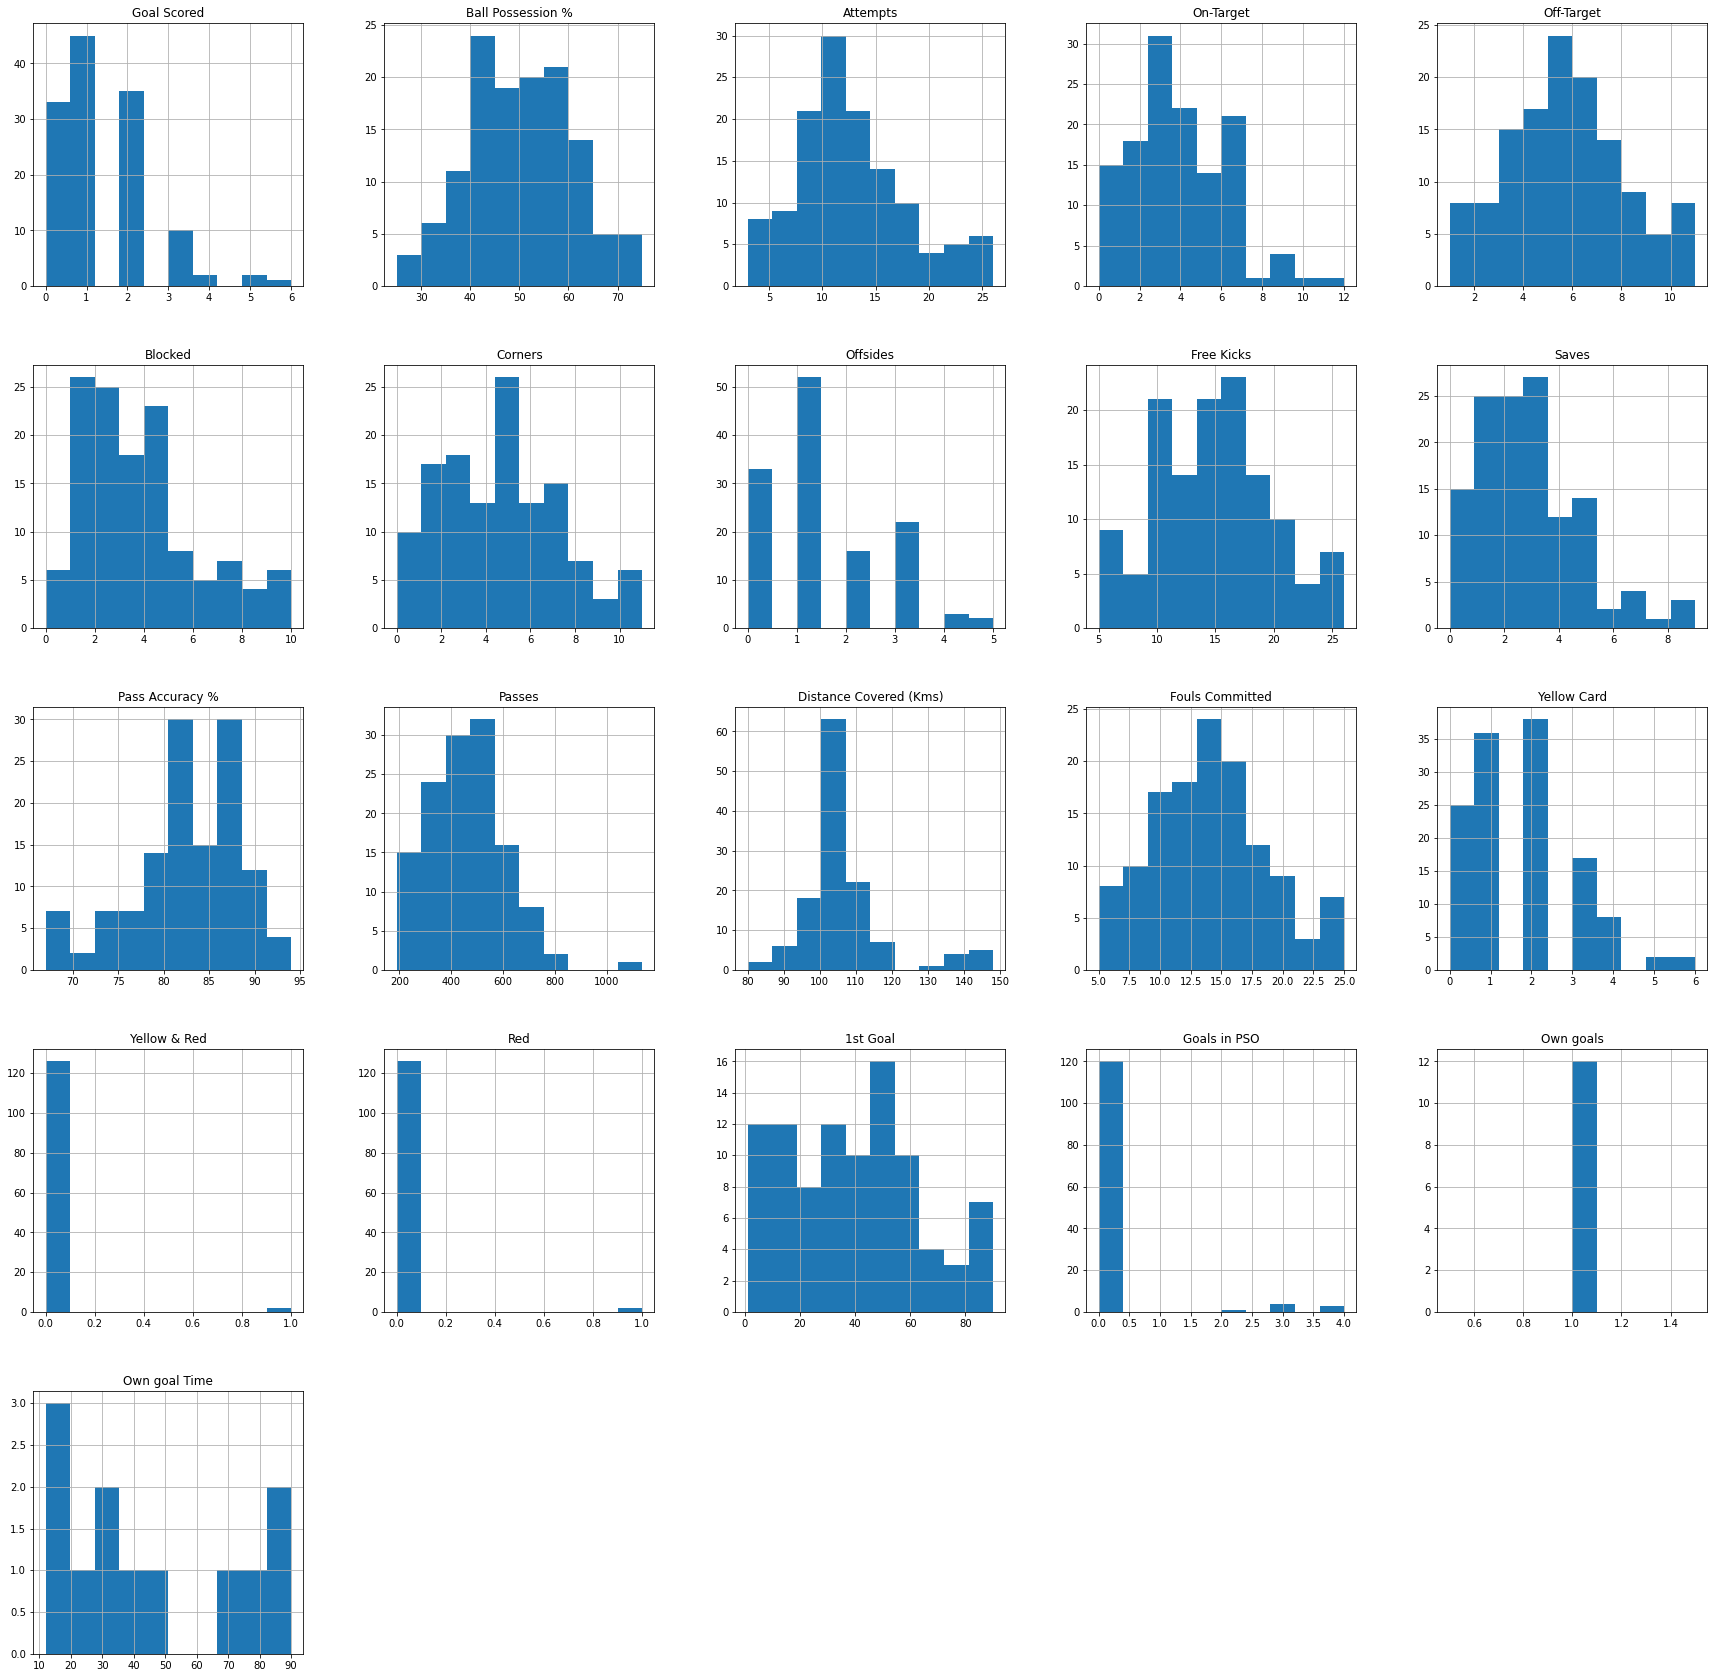

In [10]:
# pots a histogram reations between numerical data
data.hist(figsize=(30,30))
plt.plot()
print("*"*100)


Scatter plot is a great tool to see correlation degree and direction among features. Using seaborn pairplot makes this task easy for us by plotting all possible combinations.

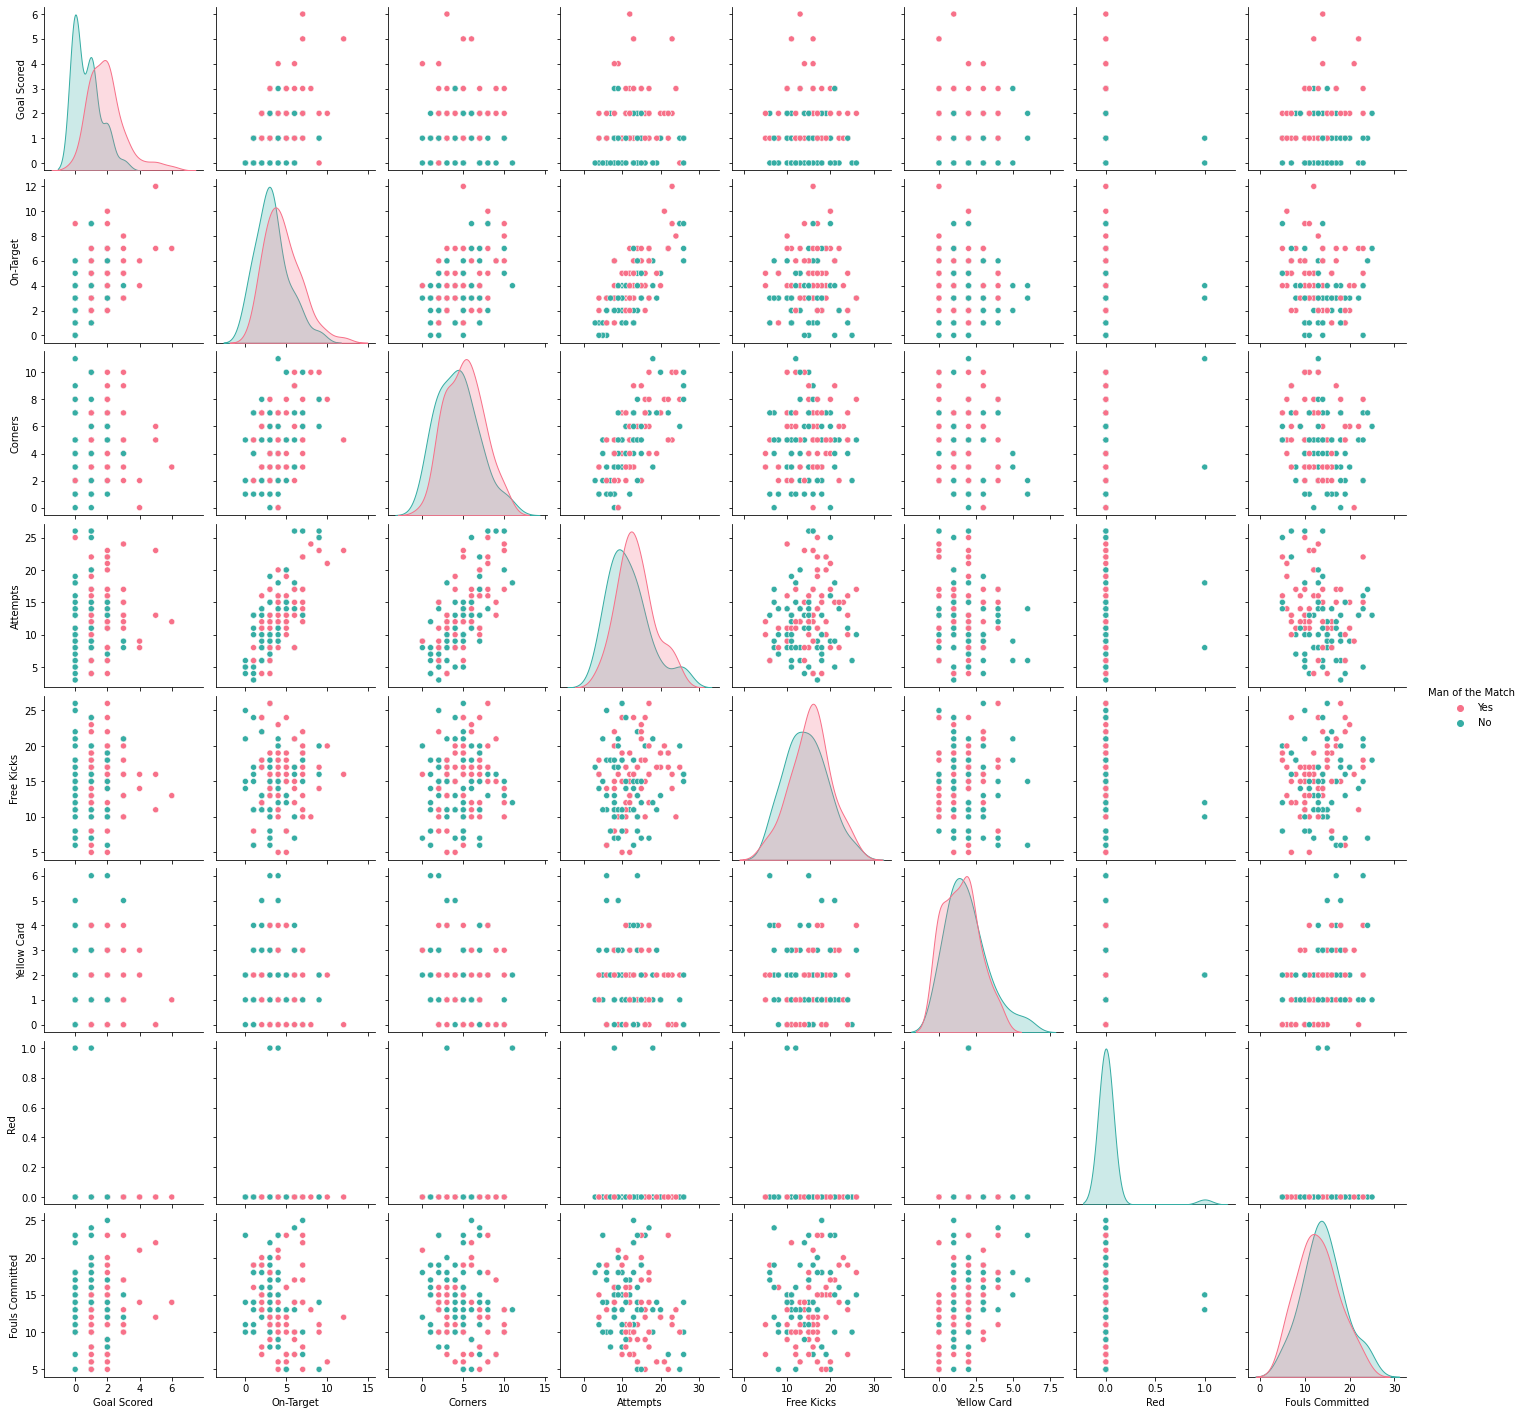

In [11]:
var1 = ['Goal Scored', 'On-Target', 'Corners', 'Attempts', 'Free Kicks', 'Yellow Card', 'Red', 'Fouls Committed']
var1.append('Man of the Match')
sns.pairplot(data[var1], hue = 'Man of the Match', palette="husl")
plt.show()
print("*"*100)



<AxesSubplot:xlabel='Man of the Match', ylabel='count'>

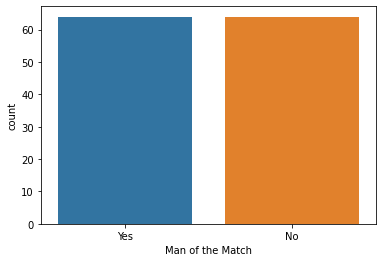

In [12]:
sns.countplot(x='Man of the Match',data = data)
print("*"*100)


Text(0.5, 1.0, 'Total goal attempts by teams')

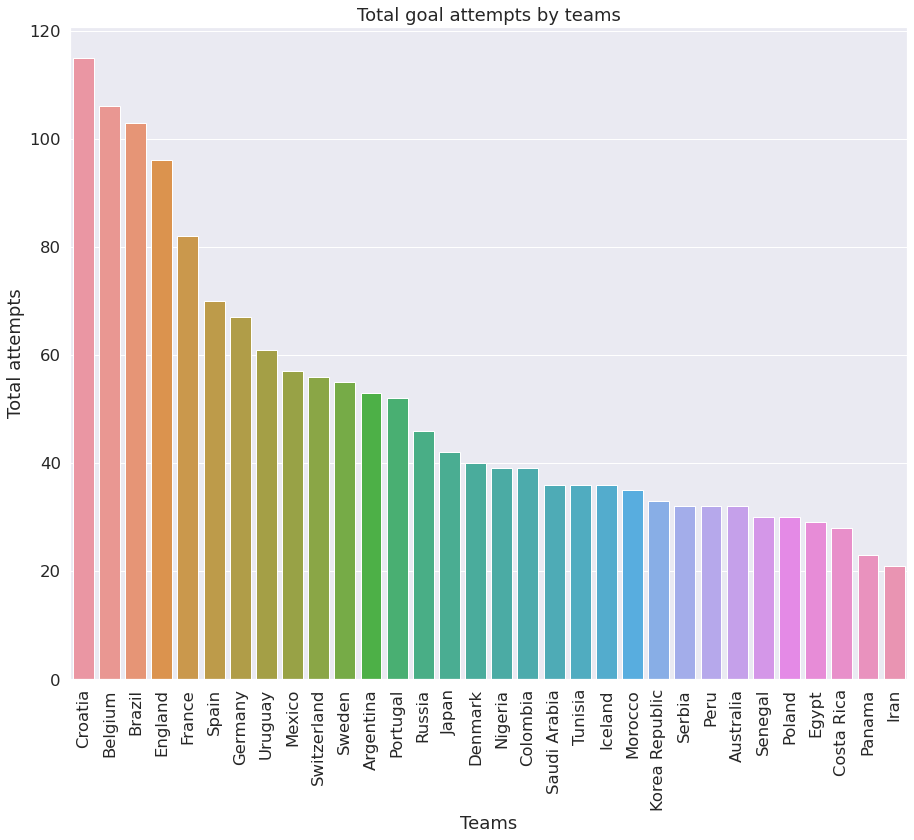

In [14]:
# Plotting total goal attempts by teams
attempts=data.groupby('Team')['Attempts'].sum().reset_index().sort_values(by=('Attempts'),ascending=False)

plt.figure(figsize = (15, 12), facecolor = None)
sns.set_style("darkgrid")
sns.set(font_scale=1.5)
plot1 = sns.barplot(x="Team", y="Attempts", data=attempts)

plot1.set_xticklabels(attempts['Team'], rotation=90, ha="center")
plot1.set(xlabel='Teams',ylabel='Total attempts')
plot1.set_title('Total goal attempts by teams')
print("*"*100)


Text(0.5, 1.0, 'Total goals scored by teams')

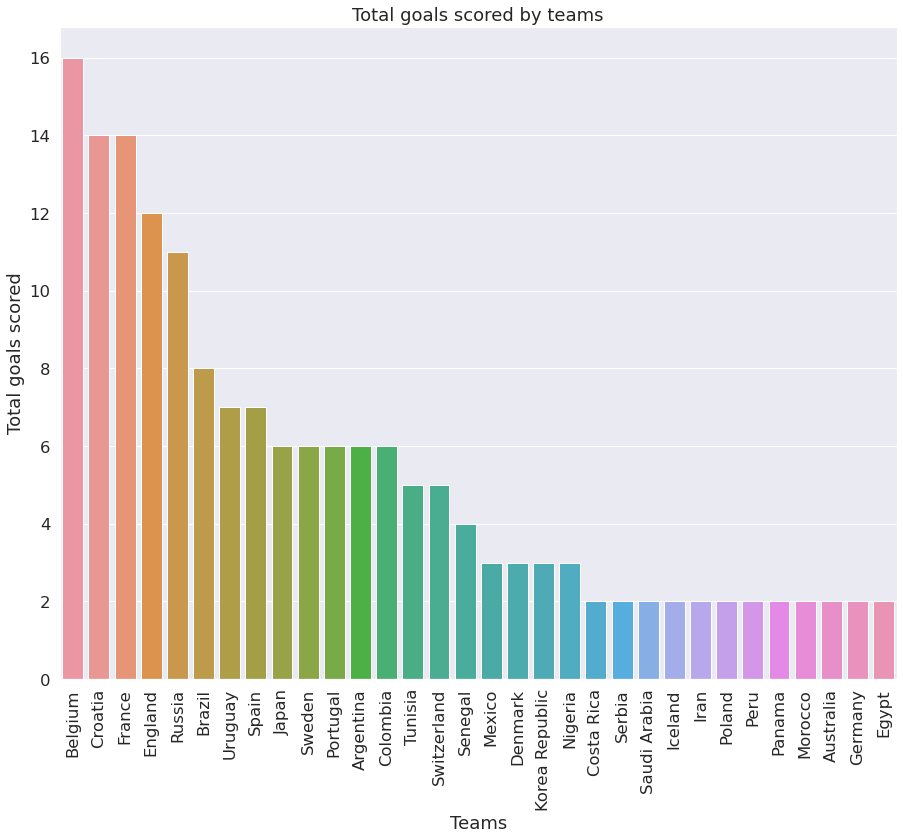

In [15]:
# Plotting total goals by teams
goals_by_team=data.groupby('Team')['Goal Scored'].sum().reset_index().sort_values(by=('Goal Scored'),ascending=False)

plt.figure(figsize = (15,12), facecolor = None)
sns.set_style("darkgrid")
sns.set(font_scale=1.5)
plot1 = sns.barplot(x="Team", y="Goal Scored", data=goals_by_team)

plot1.set_xticklabels(goals_by_team['Team'], rotation=90, ha="center")
plot1.set(xlabel='Teams',ylabel='Total goals scored')
plot1.set_title('Total goals scored by teams')
print("*"*100)


Text(0.5, 1.0, 'Mean ball possession')

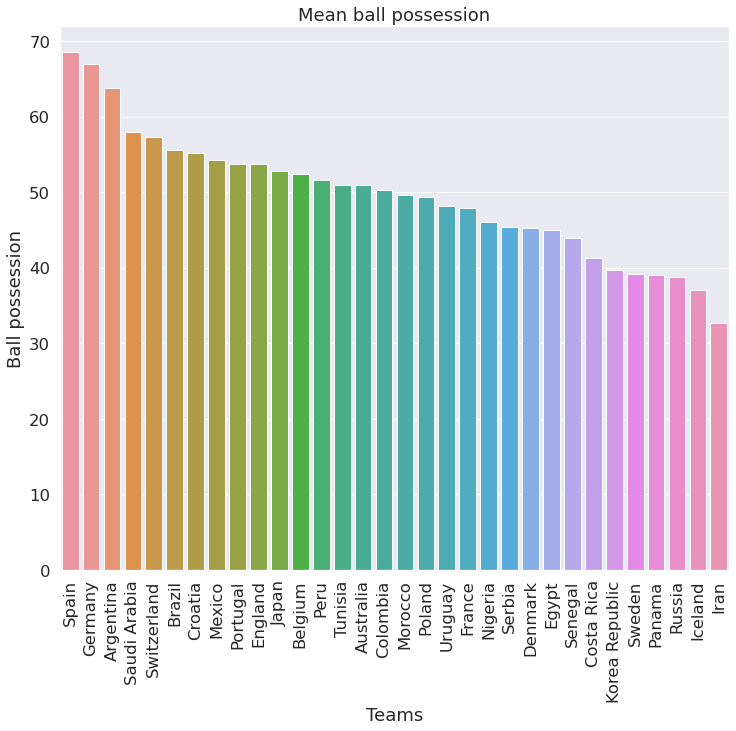

In [16]:
# Plotting mean ball possession for teams

ball_possession=data.groupby('Team')['Ball Possession %'].mean().reset_index().sort_values(by=('Ball Possession %'),ascending=False)
ball_possession 

plt.figure(figsize = (12, 10), facecolor = None)
sns.set_style("darkgrid")
sns.set(font_scale=1.5)
plot1 = sns.barplot(x="Team", y="Ball Possession %", data=ball_possession)

plot1.set_xticklabels(ball_possession['Team'], rotation=90, ha="center")
plot1.set(xlabel='Teams',ylabel='Ball possession')
plot1.set_title('Mean ball possession')
print("*"*100)


Text(0.5, 1.0, 'Most Man of the Match awards')

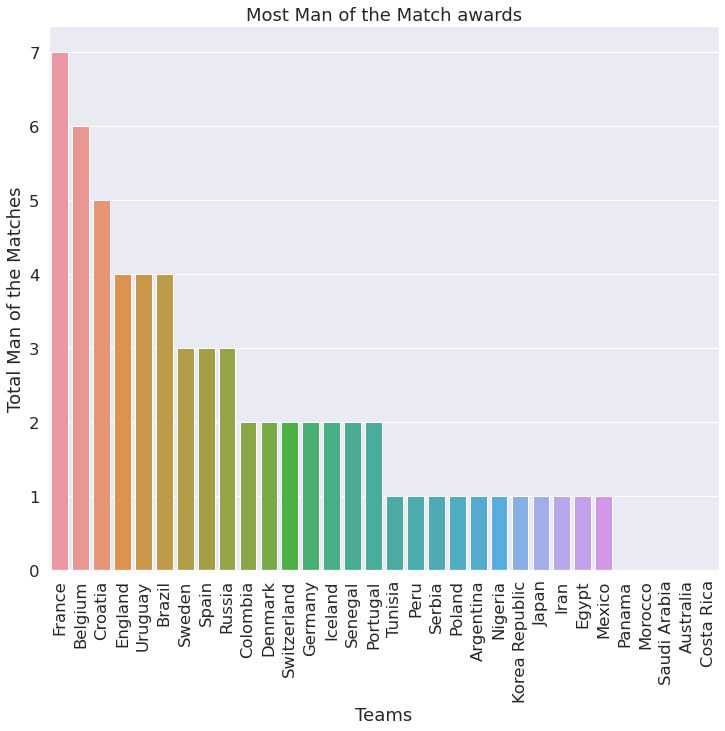

In [17]:
# Plotting total Man of the Match awards for teams

# Encoding the values for the column man of the Match
mom_1={'Man of the Match':{'Yes':1,'No':0}}
data.replace(mom_1,inplace=True)

# Converting column datatype to int
data['Man of the Match']=data['Man of the Match'].astype(int)

mom=data.groupby('Team')['Man of the Match'].sum().reset_index().sort_values(by=('Man of the Match'),ascending=False)

plt.figure(figsize = (12, 10), facecolor = None)
sns.set_style("darkgrid")
sns.set(font_scale=1.5)
plot1 = sns.barplot(x="Team", y="Man of the Match", data=mom)

plot1.set_xticklabels(mom['Team'], rotation=90, ha="center")
plot1.set(xlabel='Teams',ylabel='Total Man of the Matches')
plot1.set_title('Most Man of the Match awards')
print("*"*100)


Text(0.5, 1.0, 'Total Corners, free kicks and offsides for teams')

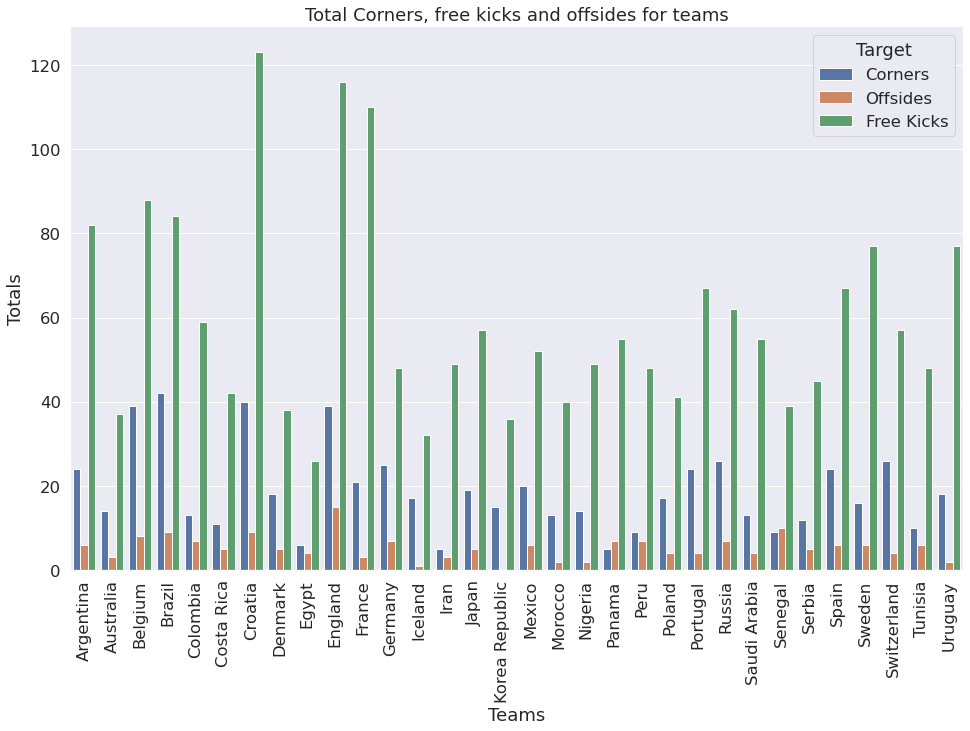

In [18]:


# Plot of total corners, free kicks and offsides for teams

corners_offsides_freekicks = data.groupby('Team')['Corners','Offsides','Free Kicks'].sum().reset_index()
corners_offsides_freekicks

# Changing the dataframe for plotting
corners_offsides_freekicks_sort = corners_offsides_freekicks.melt('Team', var_name='Target', value_name='Value')

# Plotting the new dataset created above
plt.figure(figsize = (16, 10), facecolor = None)

# style
sns.set_style("darkgrid")
sns.set(font_scale=1.5)
plot1 = sns.barplot(x="Team", y="Value", hue="Target", data=corners_offsides_freekicks_sort)

#labeling
plot1.set_xticklabels(corners_offsides_freekicks['Team'], rotation=90, ha="center")
plot1.set(xlabel='Teams',ylabel='Totals')
plot1.set_title('Total Corners, free kicks and offsides for teams')

print("*"*100)


Text(0.5, 1.0, 'Total goals conceded')

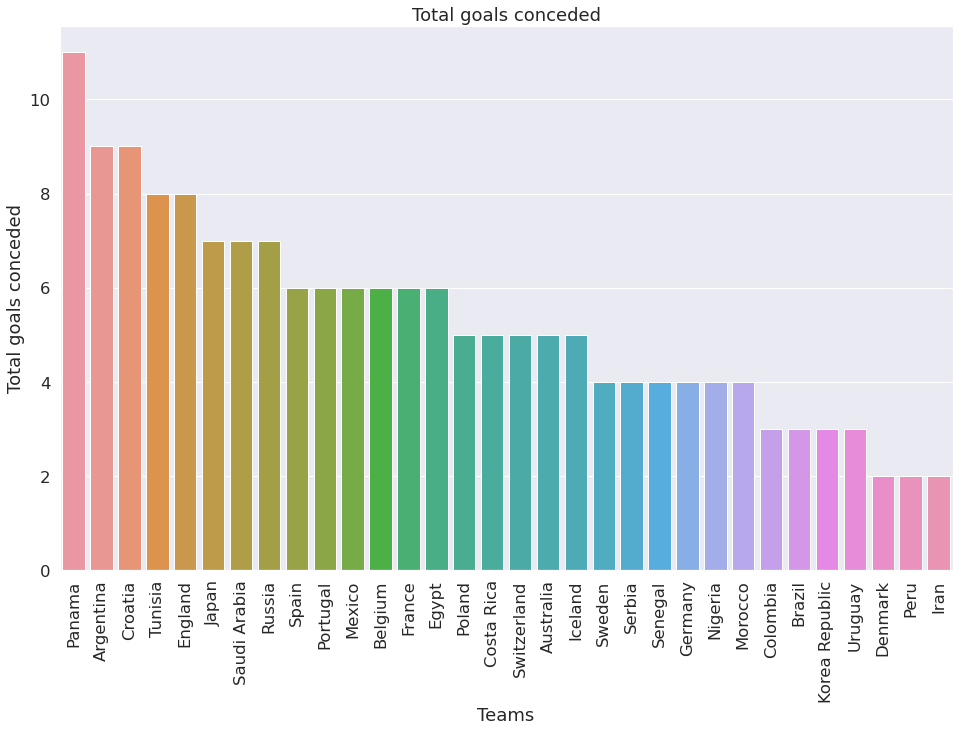

In [19]:


# Plot of total goals conceded by teams

# Most goals conceded by teams
goals_conceded = data.groupby('Opponent')['Goal Scored'].sum().reset_index().sort_values(by=('Goal Scored'), ascending=False)

plt.figure(figsize = (16, 10), facecolor = None)
sns.set_style("darkgrid")
sns.set(font_scale=1.5)
plot1 = sns.barplot(x="Opponent", y="Goal Scored", data=goals_conceded)

plot1.set_xticklabels(goals_conceded['Opponent'], rotation=90, ha="center")
plot1.set(xlabel='Teams',ylabel='Total goals conceded')
plot1.set_title('Total goals conceded')
print("*"*100)




Text(0.5, 1.0, 'Total yellow cards')

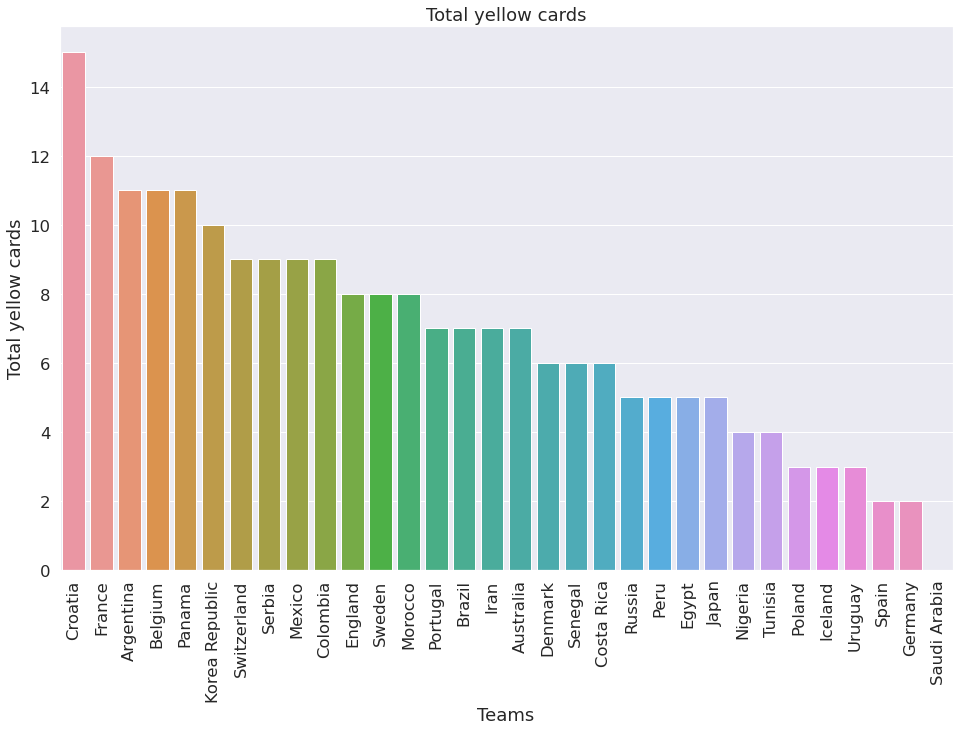

In [20]:
# Plot of Most Yellow Cards conceded by teams

# Most Yellow Cards by teams
yellow_cards = data.groupby('Team')['Yellow Card'].sum().reset_index().sort_values(by=('Yellow Card'), ascending=False)

plt.figure(figsize = (16, 10), facecolor = None)
sns.set_style("darkgrid")
sns.set(font_scale=1.5)
plot1 = sns.barplot(x="Team", y="Yellow Card", data=yellow_cards)

plot1.set_xticklabels(yellow_cards['Team'], rotation=90, ha="center")
plot1.set(xlabel='Teams',ylabel='Total yellow cards')
plot1.set_title('Total yellow cards')
print("*"*100)


In [21]:
# Sewness of numerical data
skew_values = skew(data[numerical_features], nan_policy = 'omit')
pd.concat([pd.DataFrame(list(numerical_features), columns=['Features']), 
           pd.DataFrame(list(skew_values), columns=['Skewness degree'])], axis = 1)
print("*"*100)


,Features,Skewness degree
0,Goal Scored,1.132232
1,Ball Possession %,0.002204
2,Attempts,0.645828
3,On-Target,0.792629
4,Off-Target,0.279919
5,Blocked,0.942771
6,Corners,0.302464
7,Offsides,0.819830
8,Free Kicks,0.098830
9,Saves,0.934101




For normally distributed data, the skewness should be about 0.

For unimodal continuous distributions, a skewness value > 0 means that there is more weight in the right tail of the distribution.

The function skewtest can be used to determine if the skewness value is close enough to 0, statistically speaking.

Although data is not normally distribute, there are positive as well have negative skewedness

'Yello & Red', 'Red' and 'Goals in PSO' are highly positively skewed.

In [22]:
missing_values = data.isnull().sum().sort_values(ascending = False)
percentage_missing_values = (missing_values/len(data))*100
pd.concat([missing_values, percentage_missing_values], axis = 1, keys= ['Missing values', '% Missing'])
print("*"*100)


,Missing values,% Missing
Own goal Time,116,90.6250
Own goals,116,90.6250
1st Goal,34,26.5625
Free Kicks,0,0.0000
Team,0,0.0000
Opponent,0,0.0000
Goal Scored,0,0.0000
Ball Possession %,0,0.0000
Attempts,0,0.0000
On-Target,0,0.0000


In [23]:

data.isnull().sum()
print("*"*100)


Date                        0
Team                        0
Opponent                    0
Goal Scored                 0
Ball Possession %           0
Attempts                    0
On-Target                   0
Off-Target                  0
Blocked                     0
Corners                     0
Offsides                    0
Free Kicks                  0
Saves                       0
Pass Accuracy %             0
Passes                      0
Distance Covered (Kms)      0
Fouls Committed             0
Yellow Card                 0
Yellow & Red                0
Red                         0
Man of the Match            0
1st Goal                   34
Round                       0
PSO                         0
Goals in PSO                0
Own goals                 116
Own goal Time             116
dtype: int64

## Bivariate analysis
- Understanding how statistics of one feature is impacted in presence of other features
- Commonly used tools are:
    - Pearson Correlation Coefficient (or) scatter plots
    - Pairplots

### Correlation Coefficient
It is a measure of the strength and direction of the linear relationship between two variables that is defined as the covariance of the variables divided by the product of their standard deviations.

It is of two type: Positive correlation and Negative correlation

positive correlation if the values of two variables changing with same direction

negative correlation when the values ofvariables change with opposite direction

r values always lie between -1 to + 1

Interpretation:
 Exactly -1. A perfect downhill (negative) linear relationship

 Exactly +1. A perfect uphill (positive) linear relationship


<AxesSubplot:>

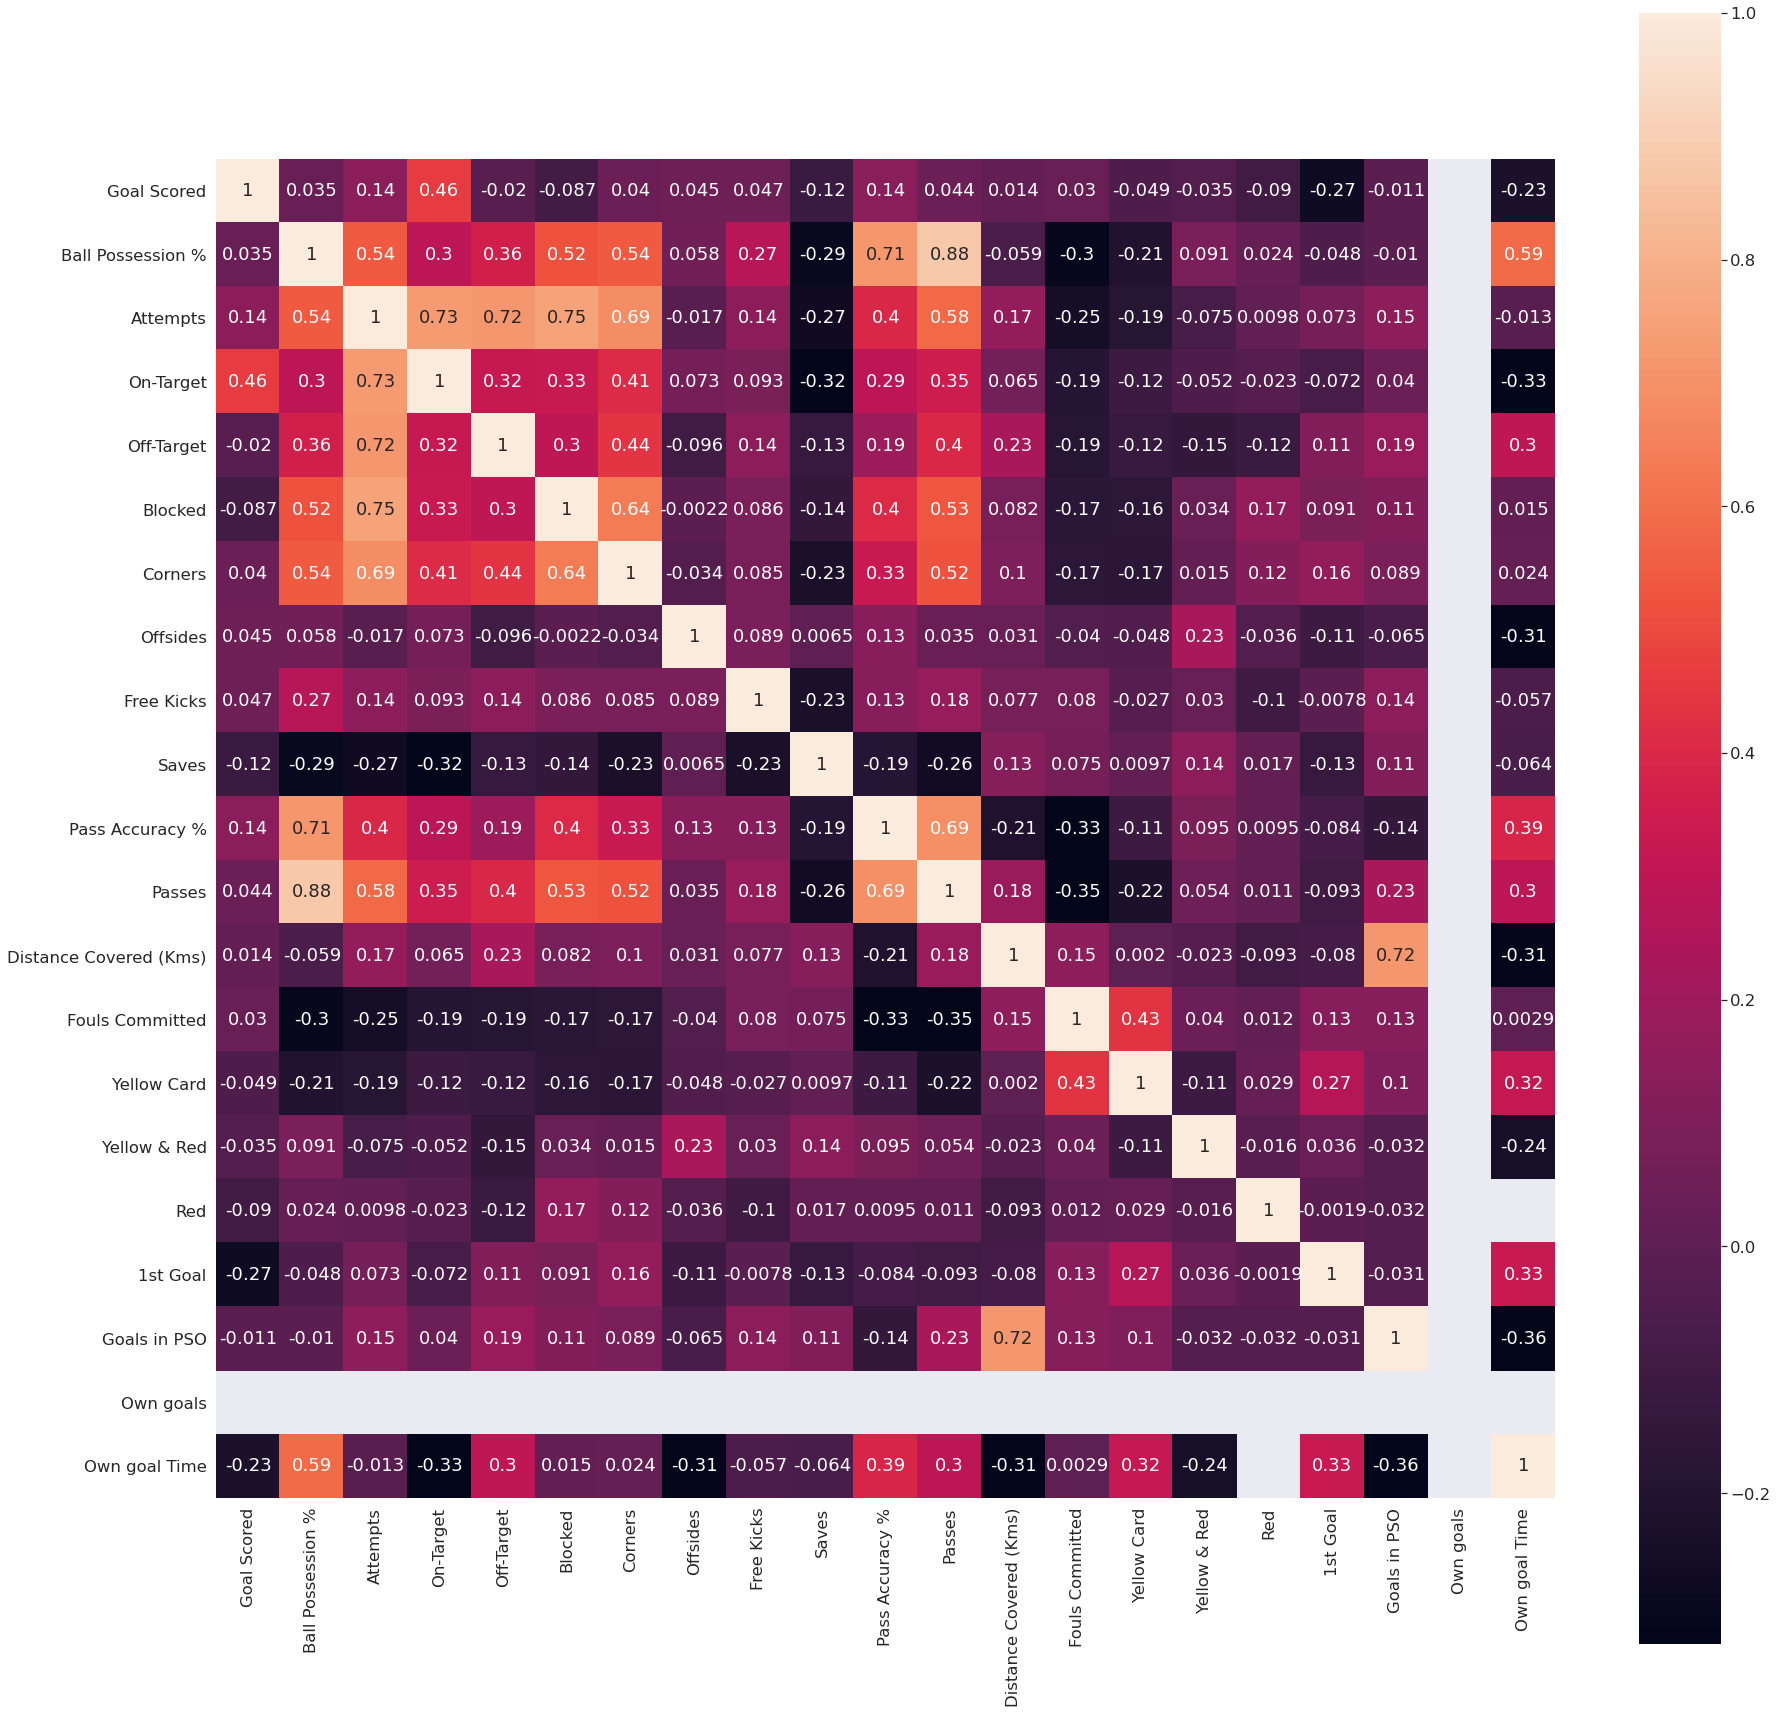

In [25]:
plt.figure(figsize=(30,30))
sns.heatmap(data[numerical_features].corr(), square=True, annot=True,robust=True, yticklabels=1)
print("*"*100)


#### So clearly Goal scored is highest correlated to target

Correlated columns needs to be removed to avoid multicollinearity. Let's use multicollinearity check

These features have least or no correlation with 'Man of the Match'
['Blocked', 'OffSides', 'Saves','Distance Covered (Kms)', 'Yellow & Red', '1st Goal', 'Goals in PSO']

These features will not have impact on aur analysis and thus, holding them or retaining them is our choice


<AxesSubplot:>

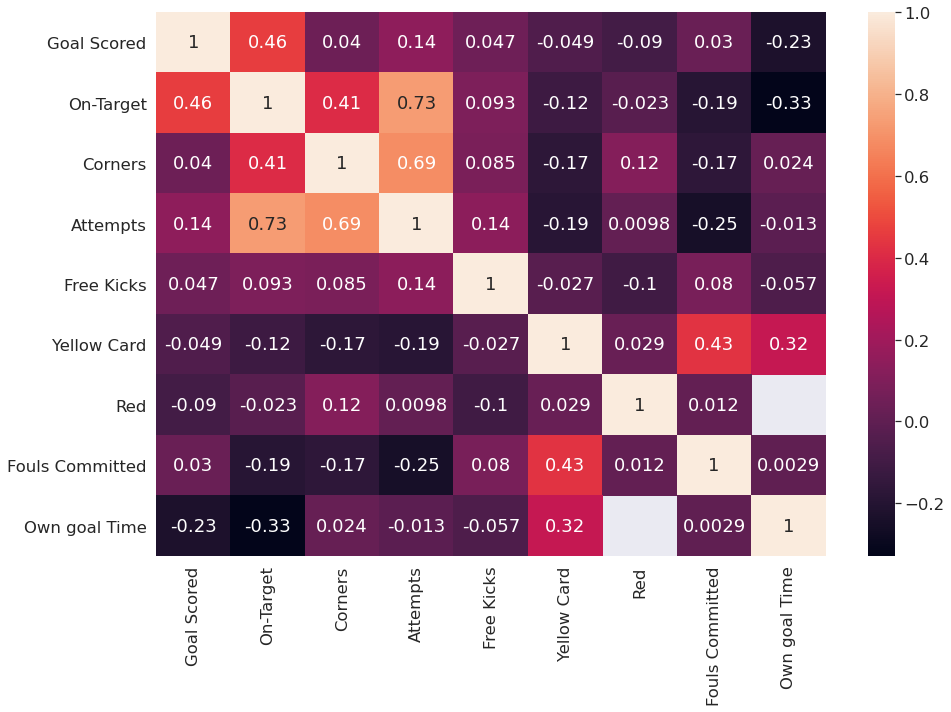

In [27]:
# Correlation with highally correlated features
var = ['Goal Scored', 'On-Target', 'Corners', 'Attempts', 'Free Kicks', 'Yellow Card', 'Red', 
       'Fouls Committed', 'Own goal Time']
plt.figure(figsize=(15,10))
sns.heatmap((data[var].corr()), annot=True)
print("*"*100)


### Outliers detection and removal

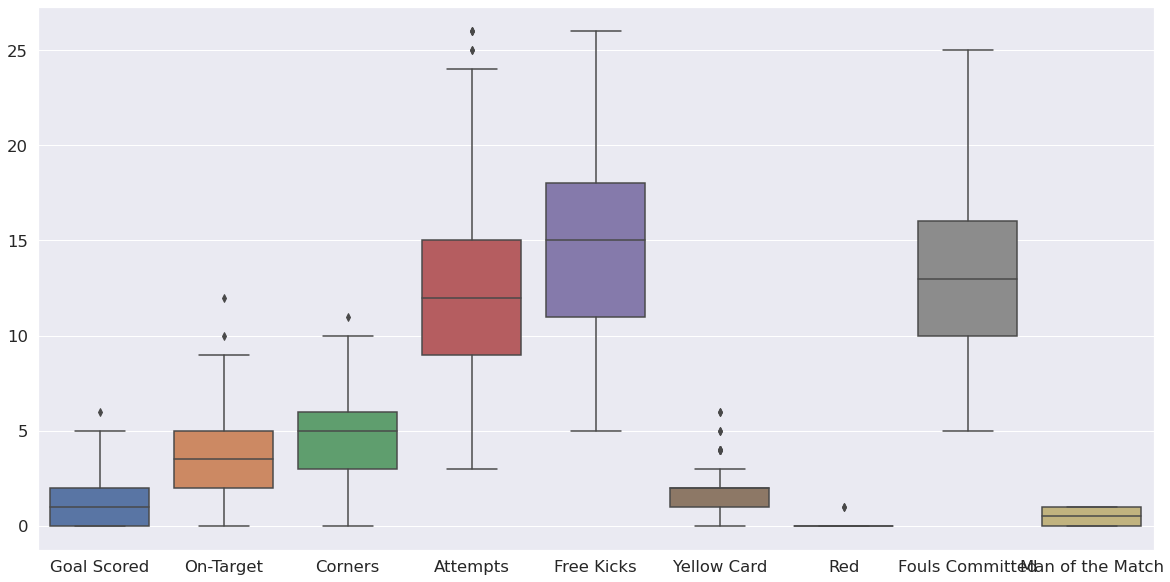

In [29]:
dummy_data = data[var1]
plt.figure(figsize=(20,10))
sns.boxplot(data = dummy_data)
plt.show()
print("*"*100)


As per boxplot there are :
-1 outlier in Goal scored

-2 in On-Target

-1 in corners

-2 in Attempts

-3 in Yellow Card

-1 in Red

#### What are Outliers
In statistics, an outlier is an observation point that is distant from other observations. An outlier may be due to variability in the measurement or it may indicate experimental error; the latter are sometimes excluded from the data set.
 
Pragmatic approach: plot scatter visualisation or boxplot and identify abnormally distant points

The quantity of outliers present in this problem is not too huge and will not have gravity impact if left untreated. They are only few and within range.

### Missing value treatment

features -- ['Own goal Time', 'Own goals', '1st Goal']  have very high percentage of missing data

so it is better to drop them

In [30]:

missing_values = data.isnull().sum().sort_values(ascending = False)
percentage_missing_values = (missing_values/len(data))*100
pd.concat([missing_values, percentage_missing_values], axis = 1, keys= ['Missing values', '% Missing'])
print("*"*100)



,Missing values,% Missing
Own goal Time,116,90.6250
Own goals,116,90.6250
1st Goal,34,26.5625
Free Kicks,0,0.0000
Team,0,0.0000
Opponent,0,0.0000
Goal Scored,0,0.0000
Ball Possession %,0,0.0000
Attempts,0,0.0000
On-Target,0,0.0000


In [31]:
data.drop(['Own goal Time', 'Own goals', '1st Goal'], axis = 1, inplace= True)
print("*"*100)


Categorical features encoding
- As machine laearning models understand only numbers data in different formats including text and dates needs to be mapped into numbers prior to feeding to the model
- The process of changing non-numerical data into numerical is called 'Encoding'
- Before encoding let's understand how many categories or levels are present in each categorical features

In [32]:
categorical_features
print("*"*100)


Index(['Date', 'Team', 'Opponent', 'Man of the Match', 'Round', 'PSO'], dtype='object')

In [33]:
# Function for finding no of unique elements in each features
def uniqueCategories(x):
    columns = list(x.columns).copy()
    for col in columns:
        print('Feature {} has {} unique values: {}'.format(col, len(x[col].unique()), x[col].unique()))
        print('\n')
uniqueCategories(data[categorical_features].drop('Date', axis = 1))
print("*"*100)


Feature Team has 32 unique values: ['Russia' 'Saudi Arabia' 'Egypt' 'Uruguay' 'Morocco' 'Iran' 'Portugal'
 'Spain' 'France' 'Australia' 'Argentina' 'Iceland' 'Peru' 'Denmark'
 'Croatia' 'Nigeria' 'Costa Rica' 'Serbia' 'Germany' 'Mexico' 'Brazil'
 'Switzerland' 'Sweden' 'Korea Republic' 'Belgium' 'Panama' 'Tunisia'
 'England' 'Colombia' 'Japan' 'Poland' 'Senegal']


Feature Opponent has 32 unique values: ['Saudi Arabia' 'Russia' 'Uruguay' 'Egypt' 'Iran' 'Morocco' 'Spain'
 'Portugal' 'Australia' 'France' 'Iceland' 'Argentina' 'Denmark' 'Peru'
 'Nigeria' 'Croatia' 'Serbia' 'Costa Rica' 'Mexico' 'Germany'
 'Switzerland' 'Brazil' 'Korea Republic' 'Sweden' 'Panama' 'Belgium'
 'England' 'Tunisia' 'Japan' 'Colombia' 'Senegal' 'Poland']


Feature Man of the Match has 2 unique values: [1 0]


Feature Round has 6 unique values: ['Group Stage' 'Round of 16' 'Quarter Finals' 'Semi- Finals' '3rd Place'
 'Final']


Feature PSO has 2 unique values: ['No' 'Yes']




Categorical -['Date', 'Team', 'Opponent','Round', 'PSO']

Nominal - Team, Opponent

Ordinal - Round

Interval - Date, PSO is binary


I believe 'Round' should also not have any impact on 'Man of the Match' because, a player performance should be consistent over all matches to become man of the match than just in a particular round. Thus, let's give equal weitage to each round.
PSO is binary

I am not going to include 'Match date' as it should definately not impact a player formance.



In [34]:
data.drop('Date', axis = 1, inplace=True)
print("*"*100)


In [35]:
data.drop(['Corners', 'Fouls Committed', 'On-Target'], axis = 1, inplace=True)
print(data.shape)
data.head()
print("*"*100)


(128, 20)


,Team,Opponent,Goal Scored,Ball Possession %,Attempts,Off-Target,Blocked,Offsides,Free Kicks,Saves,Pass Accuracy %,Passes,Distance Covered (Kms),Yellow Card,Yellow & Red,Red,Man of the Match,Round,PSO,Goals in PSO
0,Russia,Saudi Arabia,5,40,13,3,3,3,11,0,78,306,118,0,0,0,1,Group Stage,No,0
1,Saudi Arabia,Russia,0,60,6,3,3,1,25,2,86,511,105,0,0,0,0,Group Stage,No,0
2,Egypt,Uruguay,0,43,8,3,2,1,7,3,78,395,112,2,0,0,0,Group Stage,No,0
3,Uruguay,Egypt,1,57,14,6,4,1,13,3,86,589,111,0,0,0,1,Group Stage,No,0
4,Morocco,Iran,0,64,13,6,4,0,14,2,86,433,101,1,0,0,0,Group Stage,No,0


In [36]:
cleaned_data  = pd.get_dummies(data)
print("*"*100)


In [37]:
print(cleaned_data.shape)
cleaned_data.head()
print("*"*100)


(128, 88)


,Goal Scored,Ball Possession %,Attempts,Off-Target,Blocked,Offsides,Free Kicks,Saves,Pass Accuracy %,Passes,...,Opponent_Tunisia,Opponent_Uruguay,Round_3rd Place,Round_Final,Round_Group Stage,Round_Quarter Finals,Round_Round of 16,Round_Semi- Finals,PSO_No,PSO_Yes
0,5,40,13,3,3,3,11,0,78,306,...,0,0,0,0,1,0,0,0,1,0
1,0,60,6,3,3,1,25,2,86,511,...,0,0,0,0,1,0,0,0,1,0
2,0,43,8,3,2,1,7,3,78,395,...,0,1,0,0,1,0,0,0,1,0
3,1,57,14,6,4,1,13,3,86,589,...,0,0,0,0,1,0,0,0,1,0
4,0,64,13,6,4,0,14,2,86,433,...,0,0,0,0,1,0,0,0,1,0



## Now we can Appy different machine learning algorithms to predict the Man of the Match
The data has been cleaned and is ready for further steps in data pipeling
    - Pre-processing
    - Modeling
    - Evaluation
    - Prediction


### Base line model

In [39]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import r2_score, classification_report, confusion_matrix, precision_recall_curve
print("*"*100)


In [40]:
df = cleaned_data.copy()
df.describe()
print("*"*100)


,Goal Scored,Ball Possession %,Attempts,Off-Target,Blocked,Offsides,Free Kicks,Saves,Pass Accuracy %,Passes,...,Opponent_Tunisia,Opponent_Uruguay,Round_3rd Place,Round_Final,Round_Group Stage,Round_Quarter Finals,Round_Round of 16,Round_Semi- Finals,PSO_No,PSO_Yes
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,...,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,1.320312,49.992188,12.593750,5.273438,3.359375,1.343750,14.890625,2.726562,82.554688,462.648438,...,0.023438,0.039062,0.015625,0.015625,0.750000,0.062500,0.125000,0.031250,0.937500,0.062500
std,1.156519,10.444074,5.245827,2.409675,2.403195,1.193404,4.724262,2.049447,5.933766,151.186311,...,0.151883,0.194505,0.124507,0.124507,0.434714,0.243013,0.332018,0.174676,0.243013,0.243013
min,0.000000,25.000000,3.000000,1.000000,0.000000,0.000000,5.000000,0.000000,67.000000,189.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,42.000000,9.000000,4.000000,1.750000,0.000000,11.000000,1.000000,79.000000,351.000000,...,0.000000,0.000000,0.000000,0.000000,0.750000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,1.000000,50.000000,12.000000,5.000000,3.000000,1.000000,15.000000,2.000000,83.000000,462.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,2.000000,58.000000,15.000000,7.000000,4.000000,2.000000,18.000000,4.000000,87.000000,555.250000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,6.000000,75.000000,26.000000,11.000000,10.000000,5.000000,26.000000,9.000000,94.000000,1137.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [41]:
df = df.apply(LabelEncoder().fit_transform)
df.head()
print("*"*100)


,Goal Scored,Ball Possession %,Attempts,Off-Target,Blocked,Offsides,Free Kicks,Saves,Pass Accuracy %,Passes,...,Opponent_Tunisia,Opponent_Uruguay,Round_3rd Place,Round_Final,Round_Group Stage,Round_Quarter Finals,Round_Round of 16,Round_Semi- Finals,PSO_No,PSO_Yes
0,5,11,10,2,3,3,5,0,8,15,...,0,0,0,0,1,0,0,0,1,0
1,0,31,3,2,3,1,19,2,16,68,...,0,0,0,0,1,0,0,0,1,0
2,0,14,5,2,2,1,2,3,8,40,...,0,1,0,0,1,0,0,0,1,0
3,1,28,11,5,4,1,7,3,16,86,...,0,0,0,0,1,0,0,0,1,0
4,0,35,10,5,4,0,8,2,16,49,...,0,0,0,0,1,0,0,0,1,0


In [42]:
targetfet = df['Man of the Match']

features = df.drop(['Man of the Match'], axis = 1)
targetfet.shape
print("*"*100)


(128,)

In [43]:
features.shape
print("*"*100)


(128, 87)

In [44]:
####Prediction model########
#Train-Test split
from sklearn.model_selection import train_test_split
data_train, data_test, label_train, label_test = train_test_split(features, targetfet, test_size = 0.2, random_state = 42)
label_train.shape
print("*"*100)


(102,)

In [45]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
logis = LogisticRegression()
logis.fit(data_train, label_train)
logis_score_train = logis.score(data_train, label_train)
print("Training score: ",logis_score_train)
logis_score_test = logis.score(data_test, label_test)
print("Testing score: ",logis_score_test)
print("*"*100)


Training score:  0.8627450980392157
Testing score:  0.7692307692307693


In [46]:
#decision tree
from sklearn.ensemble import RandomForestClassifier
dt = RandomForestClassifier()
dt.fit(data_train, label_train)
dt_score_train = dt.score(data_train, label_train)
print("Training score: ",dt_score_train)
dt_score_test = dt.score(data_test, label_test)
print("Testing score: ",dt_score_test)
print("*"*100)


Training score:  1.0
Testing score:  0.6538461538461539


In [47]:
#random forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(data_train, label_train)
rfc_score_train = rfc.score(data_train, label_train)
print("Training score: ",rfc_score_train)
rfc_score_test = rfc.score(data_test, label_test)
print("Testing score: ",rfc_score_test)
print("*"*100)


Training score:  1.0
Testing score:  0.6153846153846154


In [48]:
#Model comparison
models = pd.DataFrame({
        'Model'          : ['Logistic Regression',  'Decision Tree', 'Random Forest'],
        'Training_Score' : [logis_score_train,  dt_score_train, rfc_score_train],
        'Testing_Score'  : [logis_score_test, dt_score_test, rfc_score_test]
    })
models.sort_values(by='Testing_Score', ascending=False)
print("*"*100)


,Model,Training_Score,Testing_Score
0,Logistic Regression,0.862745,0.769231
1,Decision Tree,1.000000,0.653846
2,Random Forest,1.000000,0.615385
